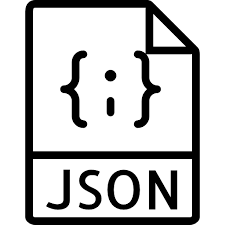

# Learning Objectives

- Load and explore a .json file in Python
- Create a clean data structure from a .json file
- Conduct descriptive analysis
- Visualize the results

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

```json
{"menu": {
  "id": 12412,
  "istest": true,
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

Can have these types in it (all relatable to Python types):

|JavaScript|JS Example               |Python Equivalent|Python Example           |
|----------|-------------------------|-----------------|-------------------------|
|Objects   |`{'key0':'v12','v':1}`   |Dictionaries     |`{'key0':'v12','v':1}`   |
|Arrays    |`[1, 'one', 'two', 3, 5]`|Lists            |`[1, 'one', 'two', 3, 5]`|
|Strings   |`'One'` or `"Two"`       |Strings          |`'One'` or `"Two"`       |
|Numbers   |`1234.5` or `8675309`    |Numbers          |`1234.5` or `8675309`    |  
|Boolean   |`true` or `false`        |Boolean          |`True` or `False`        |
|Null Value|`null`                   |None Value       |`None`                   |

# Loading a JSON File

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [45]:
# We'll need to import the json package first
import json

In [46]:
!ls

DataAnalysis-CSVCompletedPart1.ipynb   README.md
DataAnalysis-JSON.ipynb                completed
Python-Loops-and-Functions_blank.ipynb data
Python-Review_blank.ipynb              images


In [47]:
# Now use with open to load the file
with open('./data/new_releases.json', 'r') as f:
    data = json.load(f)
    

In [48]:
type(data)

dict

The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [49]:
# This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

In [50]:
# One way to make it easier to read
print(json.dumps(data, indent=4))

{
    "albums": {
        "href": "https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20",
        "items": [
            {
                "album_type": "album",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i"
                        },
                        "href": "https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i",
                        "id": "1RyvyyTE3xzB2ZywiAwp0i",
                        "name": "Future",
                        "type": "artist",
                        "uri": "spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"
                    }
                ],
                "available_markets": [
                    "AD",
                    "AE",
                    "AR",
                    "AT",
                    "AU",
                    "BE",
                    "BG",
                    "BH",
                 

In [51]:
# Using the default Jupyter Notebook's display() helps
display(data) # Uncomment this to do the same as just displaying the last line
# data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [52]:
type(data)

dict

In [53]:
data.keys()

dict_keys(['albums'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [54]:
type(data['albums'])

dict

In [55]:
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 

![](images/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [56]:
for key, value in data['albums'].items():
    print(key, type(value))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


Adding this to our diagram, we now have something like this:

![](images/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [57]:
type(data['albums']['items'])

list

In [58]:
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

We access values as we would for nested lists or dictionaries in Python.

In [59]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [60]:
data['albums']['items'][0]['artists'][0]['name']

'Future'

In [61]:
data['albums']['items'][1]['artists'][0]['name']

'Kygo'

# Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [62]:
with open('data/plants.json', 'r') as f:
    plants = json.load(f)

This dataset was gathered with the [Trefle API](https://docs.trefle.io/). It contains information about 1000 plants in JSON form.

In [63]:
type(plants)

list

In [64]:
len(plants)

1000

## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [65]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [66]:
# Let's use a default dict for this - need to import it first!
from collections import defaultdict

In [67]:
plant_dict = defaultdict(int)
for plant in plants:
    plant_dict[plant['family_common_name']] += 1

In [68]:
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [69]:
plant_dict['Beech family']

10

Are there any missing values?

In [70]:
plant_dict[None]

113

Let's remove these by using a dictionary comprehension:

In [71]:
dict_compr = {f(k):f(v) for k,v in dictionary if some condition about x}

SyntaxError: invalid syntax (<ipython-input-71-2f2161590f3a>, line 1)

In [72]:
#Fill in code belowa
fams_clean = {family:number for family, number in plant_dict.items() if family != None}

In [73]:
fams_clean.get(None, 0)

0

Let's also remove the families whose counts are less than ten:

In [74]:
#Fill in code below
fams_clean = {family:number for family, number in plant_dict.items() if number >= 10}

In [75]:
fams_clean

{'Beech family': 10,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Rose family': 49,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Pine family': 10,
 'Mint family': 45,
 None: 113,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Heath family': 17,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Sedge family': 41,
 'Borage family': 13,
 'Primrose family': 12,
 'Spurge family': 10,
 'Broom-rape family': 10,
 'Tape-grass family': 10}

Now we can make a bar chart of the numbers:

In [114]:
# Need to import matplotlib first
import matplotlib.pyplot as plt

In [115]:
plt.style.use('seaborn')

TypeError: 'value' must be an instance of str or bytes, not a NoneType

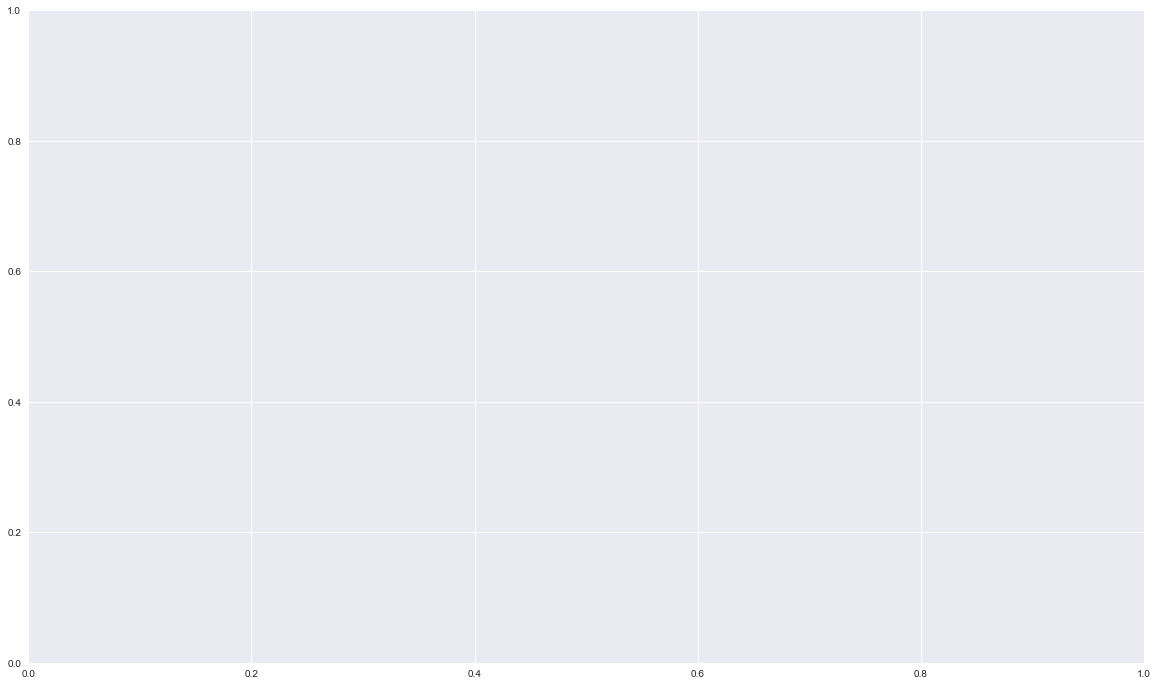

In [116]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(x=list(fams_clean.keys()), height=list(fams_clean.values()))
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

## Synonyms

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [79]:
#fill in code below
num_syn = [len(plant['synonyms']) for plant in plants]


In [81]:
num_syn[:10]

[16, 6, 31, 37, 121, 192, 20, 17, 4, 62]

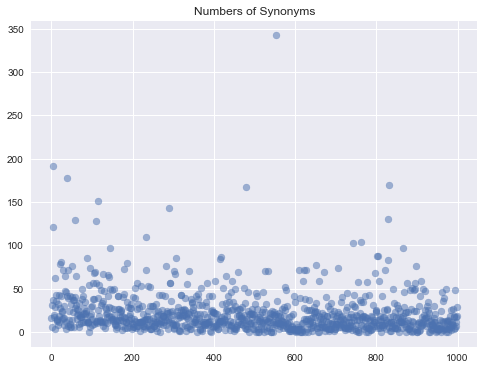

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(range(1000), num_syn, alpha=0.5)
ax.set_title('Numbers of Synonyms');

## Exercise

One plant has nearly 350 synonynms! What plant is this?

In [83]:
[plant for plant in plants if len(plant['synonyms']) > 300]

[{'id': 182597,
  'common_name': 'Irish potato',
  'slug': 'solanum-tuberosum',
  'scientific_name': 'Solanum tuberosum',
  'year': 1753,
  'bibliography': 'Sp. Pl.: 185 (1753)',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Potato family',
  'genus_id': 4329,
  'image_url': 'https://bs.plantnet.org/image/o/95a0197b33f8efe2ea7a0d25f84476415779a4b5',
  'synonyms': ['Solanum tuberosum subsp. andigenum',
   'Solanum tuberosum f. chiar-pala',
   'Solanum tuberosum var. strobilinum',
   'Solanum tuberosum var. murukewillu',
   'Solanum stenotomum var. peruanum',
   'Larnax sylvarum subsp. novogranatensis',
   'Solanum andigenum f. tiahuanacense',
   'Solanum andigenum f. pallidum',
   'Solanum tuberosum var. batatinum',
   'Solanum tuberosum var. rugiorum',
   'Solanum andigenum f. ovatibaccatum',
   'Solanum tuberosum f. contortum',
   'Solanum andigenum f. llutuc-runtum',
   'Solanum andigenum var. mexicanum',
   'Solanum tuberosum var. album',
  

<details>
    <summary>
        Answer
    </summary>

```python
[plant for plant in plants if len(plant['synonyms']) > 300]
```
</details>

## Bibliography

In [85]:
biblios = [plant['bibliography'] for plant in plants]

In [86]:
biblios[0]

'Encycl. 1: 723 (1785)'

Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [87]:
#fill in code below
hasbiblio = [plant for plant in plants if plant['bibliography'] != None]

In [88]:
len(hasbiblio)

994

In [93]:
#fill in code below
linnaeans = [plant for plant in hasbiblio if 'linnaeus' in plant['bibliography']] 
linnaeans

[]

# Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [97]:
#fill in code below
sps = [plant for plant in hasbiblio if plant['bibliography'].startswith('Sp. Pl.')]


In [98]:
sps

[{'id': 190500,
  'common_name': 'Stinging nettle',
  'slug': 'urtica-dioica',
  'scientific_name': 'Urtica dioica',
  'year': 1753,
  'bibliography': 'Sp. Pl.: 984 (1753)',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Nettle family',
  'genus_id': 1028,
  'image_url': 'https://bs.plantnet.org/image/o/85256a1c2c098e254fefe05040626a4df49ce248',
  'synonyms': ['Urtica major',
   'Urtica tibetica',
   'Urtica sicula',
   'Urtica eckloniana',
   'Urtica haussknechtii',
   'Urtica submitis'],
  'genus': 'Urtica',
  'family': 'Urticaceae',
  'links': {'self': '/api/v1/species/urtica-dioica',
   'plant': '/api/v1/plants/urtica-dioica',
   'genus': '/api/v1/genus/urtica'}},
 {'id': 126957,
  'common_name': 'Orchardgrass',
  'slug': 'dactylis-glomerata',
  'scientific_name': 'Dactylis glomerata',
  'year': 1753,
  'bibliography': 'Sp. Pl.: 71 (1753)',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Grass family',

In [104]:
#fill in code below
sp_authors = [plant['author'] for plant in sps]

In [105]:
sp_authors

['L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',

In [106]:
#fill in code below
uniq_auth = set(sp_authors)

In [108]:
uniq_auth

{'(J.Presl & C.Presl) Parl.',
 '(L.) L.',
 'A.Haines (Linnaeus)',
 'L.',
 None,
 'Willd.'}

In [111]:
#fill in code below
counts = []
for author in uniq_auth:
    counts.append(sp_authors.count(author))

In [112]:
counts

[1, 1, 2, 439, 1, 1]

In [110]:
sp_authors.count('L.')

439

In [113]:
dict(zip(uniq_auth, counts))

{'(J.Presl & C.Presl) Parl.': 1,
 None: 1,
 '(L.) L.': 2,
 'L.': 439,
 'Willd.': 1,
 'A.Haines (Linnaeus)': 1}

## Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records.

In [118]:
for plant in plants:
    try:
        if plant['bibliography'].startswith('Sp. pl.'):
            plant['author'] = 'L.'
    except:
        continue

<details>
    <summary>
        Answer
    </summary>

```python
for plant in plants:
    try:
        if plant['bibliography'].startswith('Sp. Pl.'):
            plant['author'] = 'L.'
    except:
        continue
```
</details>

# Teaser: Bringing in `pandas`: Back to Synonyms

Let's take advantage of the DataFrame tools from `pandas`:

In [119]:
# Need to first import pandas
import pandas as pd

In [120]:
plants_df = pd.DataFrame(plants)

In [144]:
plants_df.head()

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links,num_syn
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...,0
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla...",0
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',...",0
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...,0
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla...",0


## Exercises for Later

1. Add the number of synonyms as a new column called "num_syn".
2. Sort the DataFrame by number of synonyms in descending order.
3. Grab the Image URL of the plant that has the fourth-highest number of synonyms.
4. Paste it into your browser and take a look!

In [149]:
plants_df.loc[:, 'synonyms']
for plant in plants_df:
    print(plant)
    #plant['num_syn'] = len(plant.loc[])
    
   # plants_df['num_syn'] = len(plants_df.loc[:,'synonyms'].values)





plants_df

#Answer
#plants_df['num_syn'] = plants_df['synonyms'].map(len)
#sorted = plants_df.sort_values('num_syn', ascending=False)
#sorted.loc[3, 'image_url']


id
common_name
slug
scientific_name
year
bibliography
author
status
rank
family_common_name
genus_id
image_url
synonyms
genus
family
links
num_syn


,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links,num_syn
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...,1000
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla...",1000
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',...",1000
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...,1000
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla...",1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,162791,Dallisgrass,paspalum-dilatatum,Paspalum dilatatum,1804.0,"J.B.A.M.de Lamarck, Encycl. 5: 35 (1804)",Poir.,accepted,species,Grass family,2451,https://bs.plantnet.org/image/o/4d598e0790de0b...,"[Paspalum pedunculare, Paspalum ovatum, Paspal...",Paspalum,Poaceae,"{'self': '/api/v1/species/paspalum-dilatatum',...",1000
996,191969,Mung bean,vigna-radiata,Vigna radiata,1954.0,Fl. Congo Belge 6: 286 (1954),(L.) R.Wilczek,accepted,species,Pea family,6303,https://bs.plantnet.org/image/o/0457e52a60ae8a...,"[Phaseolus radiatus, Pueraria chanetii, Azukia...",Vigna,Fabaceae,"{'self': '/api/v1/species/vigna-radiata', 'pla...",1000
997,641928,Spiny broom,calicotome-villosa,Calicotome villosa,1808.0,Neues J. Bot. 2(2): 51 (1808),(Poir.) Link,accepted,species,Pea family,13040,https://bs.plantnet.org/image/o/6032fde46086a3...,"[Cytisus laniger, Genista lanigera, Spartium l...",Calicotome,Fabaceae,"{'self': '/api/v1/species/calicotome-villosa',...",1000
998,131643,Fewflower spikerush,eleocharis-quinqueflora,Eleocharis quinqueflora,1949.0,Mitt. Thüring. Bot. Ges. 1: 89 (1949),(Hartmann) O.Schwarz,accepted,species,Sedge family,2672,None,"[Scirpus campestris, Eleocharis pauciflora, Sc...",Eleocharis,Cyperaceae,{'self': '/api/v1/species/eleocharis-quinquefl...,1000


<details>
    <summary>Answer here
    </summary>

```python
plants_df['num_syn'] = plants_df['synonyms'].map(len)
sorted = plants_df.sort_values('num_syn', ascending=False)
sorted.loc[3, 'image_url']
```
</details>

# Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

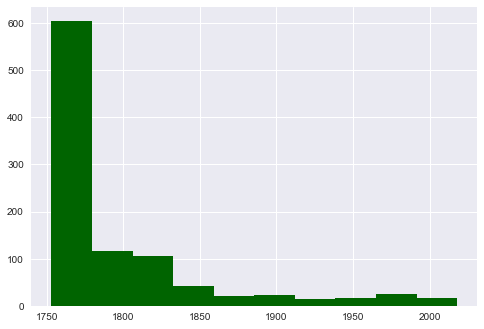

In [122]:
fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

## Exercise

How many plants have first been written about just in the last 20 years? Make a bar chart or pie chart that shows the distribution by family of these plants.

<details>
    <summary>
        One answer here
    </summary>

```python
recent = plants_df[plants_df['year'] >= 2001]
fig, ax = plt.subplots(1, 2, figsize=(14, 6)
ax[0].bar(recent['family_common_name'].value_counts().index,
       recent['family_common_name'].value_counts(),
      color='darkgreen')
ax[1].pie(recent['family_common_name'].value_counts(),
      labels=recent['family_common_name'].value_counts().index,
      radius=1.2, labeldistance=0.4, rotatelabels=True);
```    
</details>